Model Selection & Evaluation

Cross Validation

Simple models underfit.
Accuracy for training data & validation data is not much different.
But, accurcy ain't that great.
This situation is of low variance & high bias
On moving towards complex models, accuracy improves.
But, gap between accuracy on training data & validation data increases
This situation is of high variance & low bias

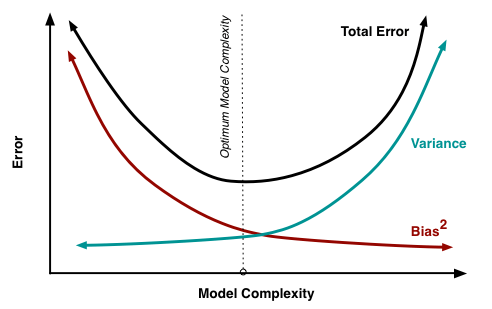

We need to compare across models to find the best model.
We need to compare across all hyper-parameters for a particular model.
The data that is used for training should not be used for validation.
The validation accuracy is the one that we claims

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

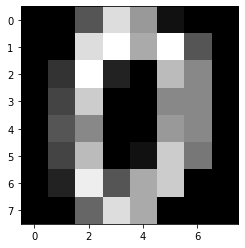

In [5]:
plt.imshow(digits.images[0],cmap='gray')

In [6]:
dt = DecisionTreeClassifier(max_depth=10)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)

In [9]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(max_depth=10)

In [10]:
dt.score(testX,testY)

0.8555555555555555

In [11]:
dt.score(trainX,trainY)

0.9881217520415738

Decreasing the complexity of model

In [12]:
dt = DecisionTreeClassifier(max_depth=7)

In [13]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(max_depth=7)

In [14]:
dt.score(testX,testY)

0.7977777777777778

In [15]:
dt.score(trainX,trainY)

0.910913140311804

Observation : With decrease in complexity the gap in training & validation accuracy also decreased

Cross Validation API

Splits data into k parts.
Use k - 1 parts for training the model
Use kth part for validation
Repeat the above steps multiple times to get a genralized behaviour

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
scores = cross_val_score(dt, digits.data, digits.target)

In [18]:
scores.mean()

0.740719591457753

Cross-validate Function : Scores for multiple matrices

In [19]:
from sklearn.model_selection import cross_validate

In [20]:
scoring = ['precision_macro', 'recall_macro', 'accuracy']

In [21]:
cross_validate(dt, digits.data, digits.target, scoring=scoring, cv=5)

{'fit_time': array([0.02393436, 0.02094173, 0.02290177, 0.02094221, 0.02194047]),
 'score_time': array([0.00498772, 0.00402784, 0.00399137, 0.00797772, 0.00199556]),
 'test_precision_macro': array([0.76416901, 0.70505529, 0.7777841 , 0.78841312, 0.78622972]),
 'test_recall_macro': array([0.75287645, 0.6615015 , 0.76479988, 0.77000215, 0.77128271]),
 'test_accuracy': array([0.75277778, 0.66111111, 0.76601671, 0.77158774, 0.76880223])}

Stratification for dealing with imbalanced Classes

StratifiedKFold
Class frequencies are preserved in data splitting

In [22]:
import numpy as np

In [23]:
Y = np.append(np.ones(12),np.zeros(6))

In [24]:
X = np.ones((18,3))

In [25]:
from sklearn.model_selection import StratifiedKFold

In [26]:
skf = StratifiedKFold(n_splits=3)

In [27]:
list(skf.split(X,Y))

[(array([ 4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17]),
  array([ 0,  1,  2,  3, 12, 13])),
 (array([ 0,  1,  2,  3,  8,  9, 10, 11, 12, 13, 16, 17]),
  array([ 4,  5,  6,  7, 14, 15])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7, 12, 13, 14, 15]),
  array([ 8,  9, 10, 11, 16, 17]))]

In [28]:
Y[[ 4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17]]

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

Hyperparameter Tuning

Model parameters are learnt by learning algorithms based on data
Hyper-parameters needs to be configured
Hyper-parameters are data dependent & many times need experiments to find the best
sklearn provides GridSerach for finding the best hyper-parameters

Exhaustive GridSearch

Searches sequentially for all the configued params
For all possible combinations

In [29]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)

In [30]:
dt = DecisionTreeClassifier()

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
grid_search = GridSearchCV(dt, param_grid={'max_depth':range(5,30,5)}, cv=5)

In [33]:
grid_search.fit(digits.data,digits.target)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 30, 5)})

In [34]:
grid_search.best_params_

{'max_depth': 15}

In [35]:
grid_search.best_score_

0.7924682760755183

In [36]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=15)

RandomizedSearch

Unlike GridSearch, not all parameters are tried & tested
But rather a fixed number of parameter settings is sampled from the specified distributions.

Comparing GridSearch and RandomSearchCV

In [38]:
from time import time

#randint is an intertor for generating numbers between range specified
from scipy.stats import randint

In [39]:
X = digits.data
Y = digits.target

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [41]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": randint(1,11),
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [42]:
param_dist

{'max_depth': [3, None],
 'max_features': <scipy.stats._distn_infrastructure.rv_frozen at 0x27c6e878dc0>,
 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen at 0x27c6d5f64f0>,
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

In [43]:
rf = RandomForestClassifier(n_estimators=20)

In [44]:
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X, Y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

RandomizedSearchCV took 7.72 seconds for 20 candidates parameter settings.


In [45]:
random_search.best_score_

0.9338053234292788

In [46]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X, Y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

GridSearchCV took 23.73 seconds for 72 candidate parameter settings.


In [47]:
grid_search.best_score_

0.9337944908696999

GridSearch & RandomizedSearch can fine tune hyper-parameters of transformers as well when part of pipeline

Model Evaluation

Three different ways to evaluate quality of model prediction
score method of estimators, a default method is configured .i.e r2_score for regression, accuracy for classification
Model evalutaion tools like cross_validate or cross_val_score also returns accuracy
Metrices module is rich with various prediction error calculation techniques

In [48]:
trainX, testX, trainY, testY = train_test_split(X,Y)

In [49]:
rf.fit(trainX, trainY)

RandomForestClassifier(n_estimators=20)

Technique 1 - Using score function

In [50]:
rf.score(testX,testY)

0.9644444444444444

Technique 2 - Using cross_val_score as discussed above

In [51]:
cross_val_score(rf,X,Y,cv=5)

array([0.91666667, 0.85833333, 0.94986072, 0.94986072, 0.91364903])

Cancer prediction sample for understanding metrices

In [52]:
from sklearn.datasets import load_breast_cancer

In [53]:
dt = DecisionTreeClassifier()

In [54]:
cancer_data = load_breast_cancer()

In [55]:
trainX, testX, trainY, testY = train_test_split(cancer_data.data, cancer_data.target)

In [56]:
dt.fit(trainX,trainY)

DecisionTreeClassifier()

In [57]:
pred = dt.predict(testX)

Technique 3 - Using metrices

Classfication metrices

Accuracy Score - Correct classification vs ( Correct classification + Incorrect Classification )

In [58]:
from sklearn import metrics

In [59]:
metrics.accuracy_score(y_pred=pred, y_true=testY)

0.9300699300699301

Confusion Matrix - Shows details of classification inclusing TP,FP,TN,FN

True Positive (TP), Actual class is 1 & prediction is also 1
True Negative (TN), Actual class is 0 & prediction is also 0
False Positive (FP), Acutal class is 0 & prediction is 1
False Negative (FN), Actual class is 1 & prediction is 0

In [60]:
metrics.confusion_matrix(y_pred=pred, y_true=testY, labels=[0,1])

array([[49,  5],
       [ 5, 84]], dtype=int64)

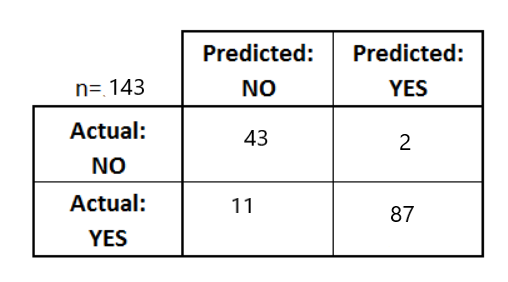

Precision Score

Ability of a classifier not to label positive if the sample is negative
Claculated as TP/(TP+FP)
We don't want a non-spam mail to be marked as spam

In [61]:
metrics.precision_score(y_pred=pred, y_true=testY)

0.9438202247191011

Recall Score

Ability of classifier to find all positive samples
It's ok to predict patient tumor to be cancer so that it undergoes more test
But it is not ok to miss a cancer patient without further analysis

In [62]:
metrics.recall_score(y_pred=pred, y_true=testY)

0.9438202247191011

F1 score

Weighted average of precision & recall

In [63]:
metrics.f1_score(y_pred=pred, y_true=testY)

0.9438202247191011

ROC & AUC

House Price Prediction - Understanding matrices

In [68]:
from sklearn.datasets import fetch_california_housing

In [71]:
house_data = fetch_california_housing()

In [72]:
house_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr = LinearRegression()

In [75]:
lr.fit(house_data.data, house_data.target)

LinearRegression()

In [76]:
pred = lr.predict(house_data.data)

Matrices for Regression

mean squared error - Sum of squares of difference between expected value & actual value

In [77]:
metrics.mean_squared_error(y_pred=pred, y_true=house_data.target)

0.5243209861846071

mean absolute error - Sum of abs of difference between expected value & actual value

In [78]:
metrics.mean_absolute_error(y_pred=pred, y_true=house_data.target)

0.5311643817546444

r2 score

Returns accuracy of model in the scale of 0 & 1
It measures goodness of fit for regression models
Calculated as = (variance explained by the model)/(Total variance)
High r2 means target is close to prediction

In [79]:
metrics.r2_score(y_pred=pred, y_true=house_data.target)

0.6062326851998051

Metrices for Clustering

Two forms of evaluation

supervised, which uses a ground truth class values for each sample.
completeness_score
homogeneity_score

unsupervised, which measures the quality of model itself
silhoutte_score
calinski_harabaz_score

completeness_score

A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
Accuracy is 1.0 if data belonging to same class belongs to same cluster, even if multiple classes belongs to same cluster

In [80]:
from sklearn.metrics.cluster import completeness_score

In [81]:
completeness_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

the acuracy is 1.0 because all the data belonging to same class belongs to same cluster

In [82]:
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.3836885465963443

The accuracy is .3 because class 1 - [11,22,11], class 2 - [22]

homogeneity_score

A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

In [83]:
from sklearn.metrics.cluster import homogeneity_score

In [84]:
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [85]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

0.9999999999999999

In [86]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

1.0

Same class data is broken into two clusters

silhoutte_score

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

Selecting the number of clusters with silhouette analysis on KMeans clustering

In [87]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

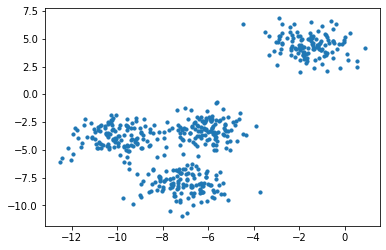

In [88]:
plt.scatter(X[:,0],X[:,1],s=10)

In [89]:
range_n_clusters = [2, 3, 4, 5, 6]

In [90]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [91]:
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, silhouette_score(X,labels))

2 0.7049787496083262
3 0.5882004012129721
4 0.6505186632729437
5 0.5739921611650484
6 0.4967039889792054


The best number of clusters is 2

calinski_harabasz_score

The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.

In [95]:
from sklearn.metrics import calinski_harabasz_score

In [96]:
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, calinski_harabasz_score(X,labels))

2 1604.112286409658
3 1809.991966958033
4 2704.4858735121097
5 2281.9336557836496
6 2035.4407309952178


Model Persistance

Model training is an expensive process
It is desireable to save the model for future reuse
using pickle & joblib this can be achieved

In [97]:
import pickle

In [98]:
s = pickle.dumps(dt)

In [99]:
pickle.loads(s)

DecisionTreeClassifier()

In [100]:
type(s)

bytes

joblib is better extension of pickle
Doesn't convert into string

In [102]:
import joblib

In [103]:
joblib.dump(dt, 'dt.joblib')

['dt.joblib']

Loading the file back into model

In [104]:
dt = joblib.load('dt.joblib')

In [105]:
dt

DecisionTreeClassifier()

Validation Curves

To validate a model, we need a scoring function.
Create a grid of possible hyper-prameter configuration.
Select the hyper-parameter which gives the best score

In [106]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 50, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             digits.data, 
                                             digits.target, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

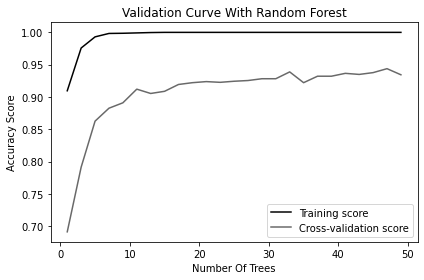

In [107]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Learning Curves

Learning curves show variation in training & validation score on increasing the number of samples

In [108]:
from sklearn.model_selection import learning_curve